In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Convert 'Date' to DateTime format
df["Date"] = pd.to_datetime(df["Date"])

# Set 'Date' as the index
df.set_index("Date", inplace=True)

# Display first few rows
print(df.head())


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [4]:
# Apply Seasonal Decomposition (STL)
decomposition = seasonal_decompose(df["Temp"], model="additive", period=365)

# Extract Trend, Seasonality, and Residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


<ipython-input-5-e90626c22efe>:30: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


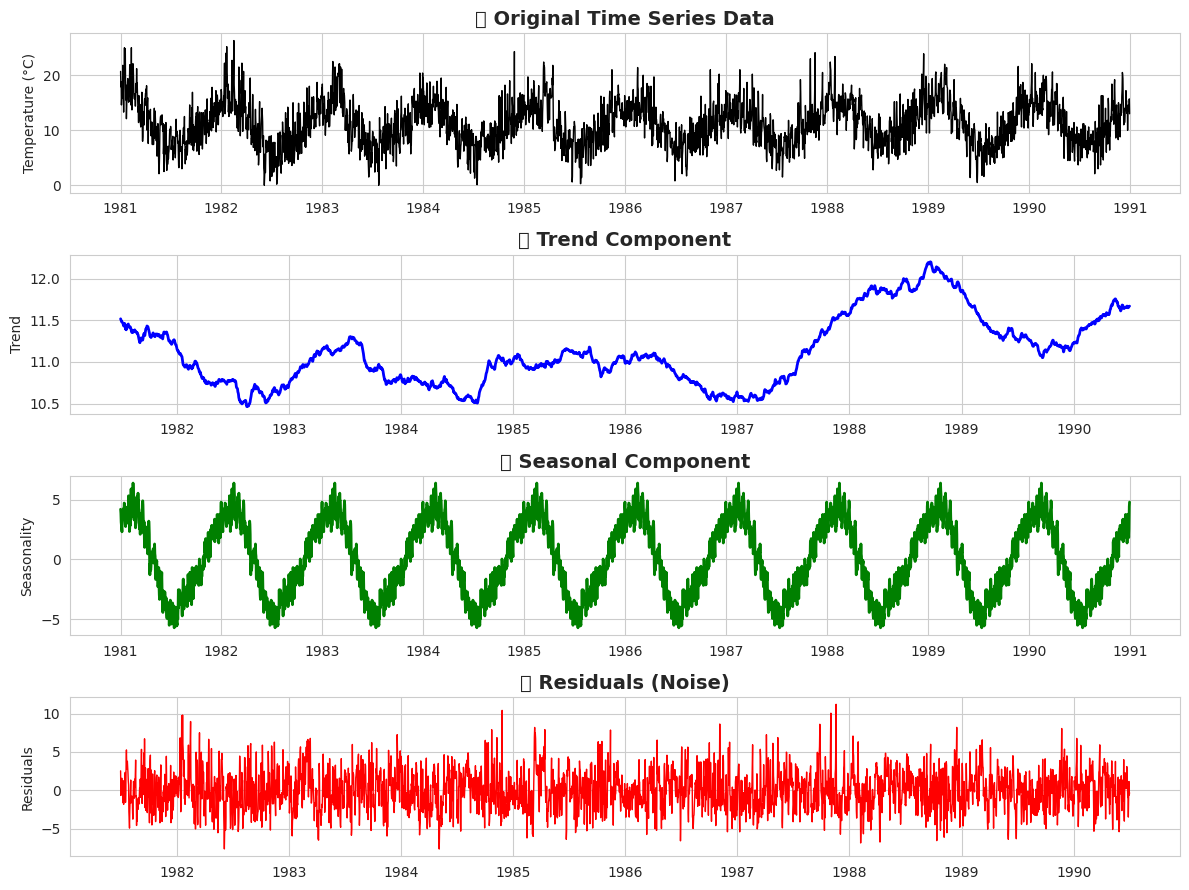

In [5]:
# Set up the figure
plt.figure(figsize=(12, 9))
sns.set_style("whitegrid")

# Plot Original Data
plt.subplot(4, 1, 1)
plt.plot(df["Temp"], color="black", linewidth=1)
plt.title("🔹 Original Time Series Data", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)")

# Plot Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, color="blue", linewidth=2)
plt.title("🔹 Trend Component", fontsize=14, fontweight='bold')
plt.ylabel("Trend")

# Plot Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, color="green", linewidth=2)
plt.title("🔹 Seasonal Component", fontsize=14, fontweight='bold')
plt.ylabel("Seasonality")

# Plot Residuals (Random Noise)
plt.subplot(4, 1, 4)
plt.plot(residual, color="red", linewidth=1)
plt.title("🔹 Residuals (Noise)", fontsize=14, fontweight='bold')
plt.ylabel("Residuals")

# Improve Layout
plt.tight_layout()
plt.show()
